In [1]:
# Installing the required libraries.
!pip install imutils

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


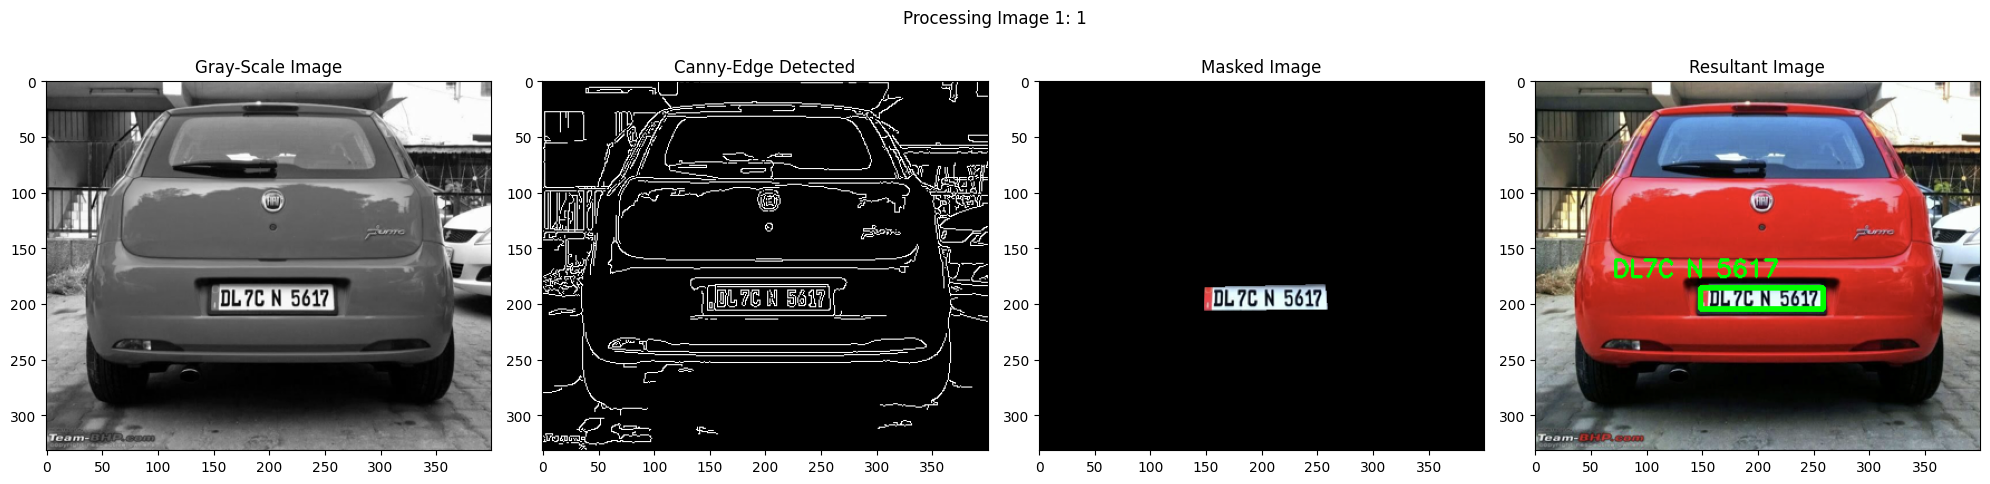

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


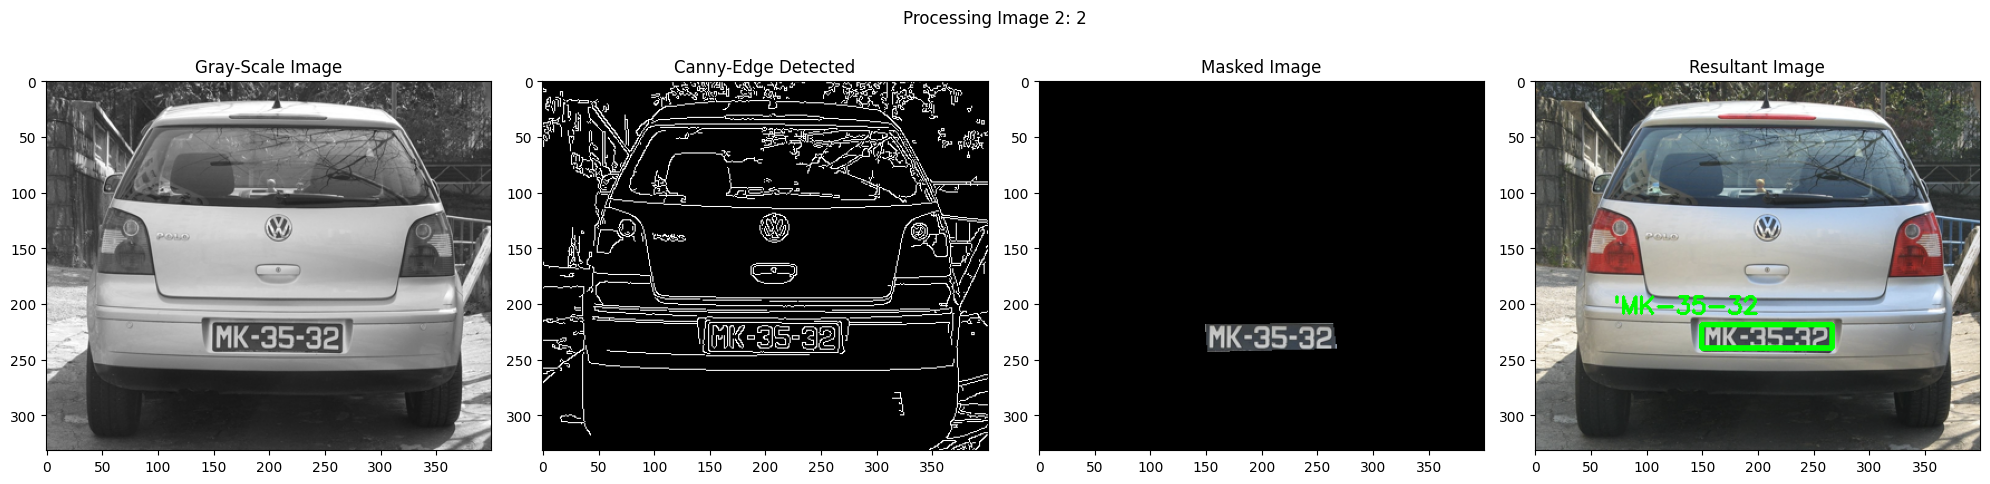

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


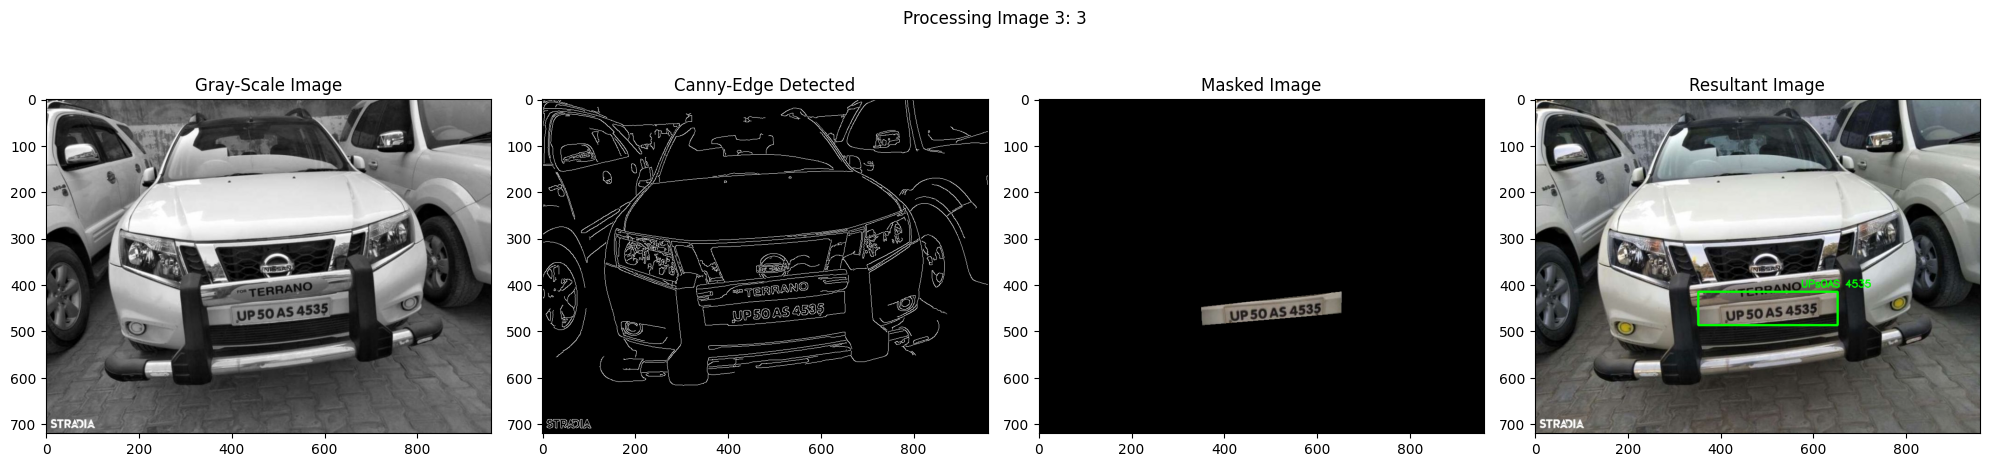

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


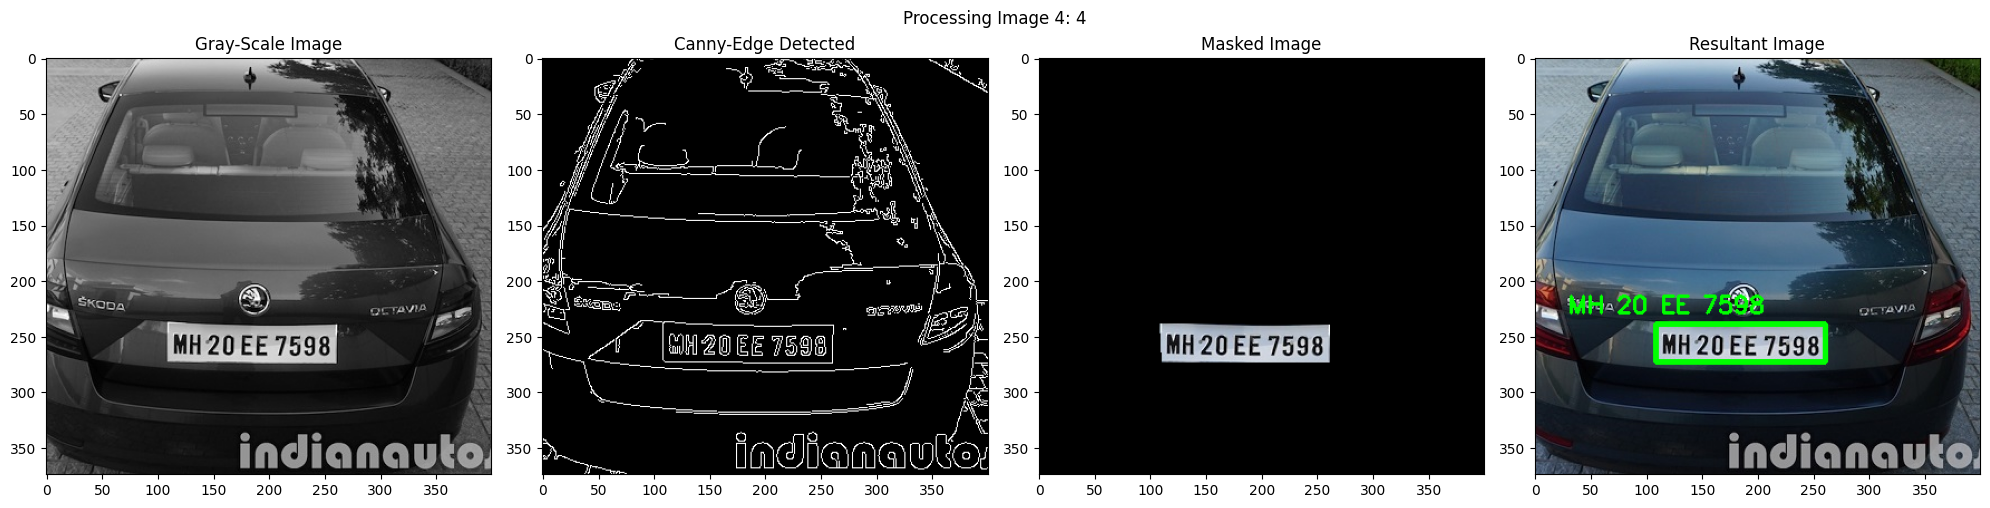

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


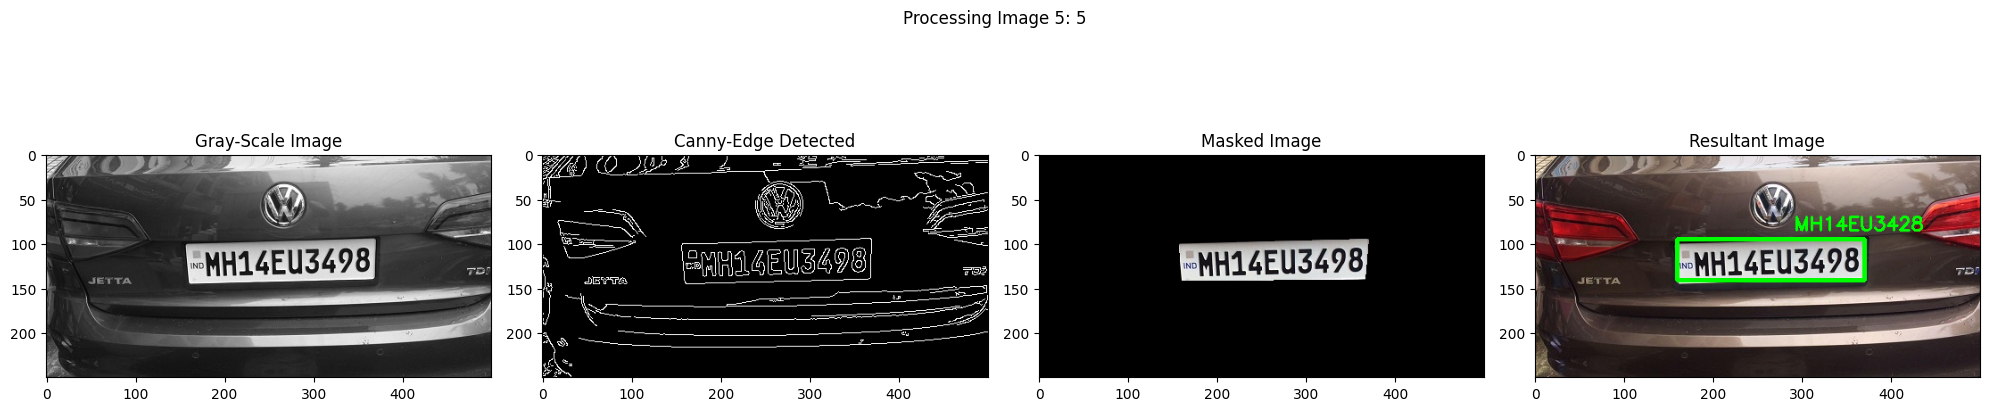

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


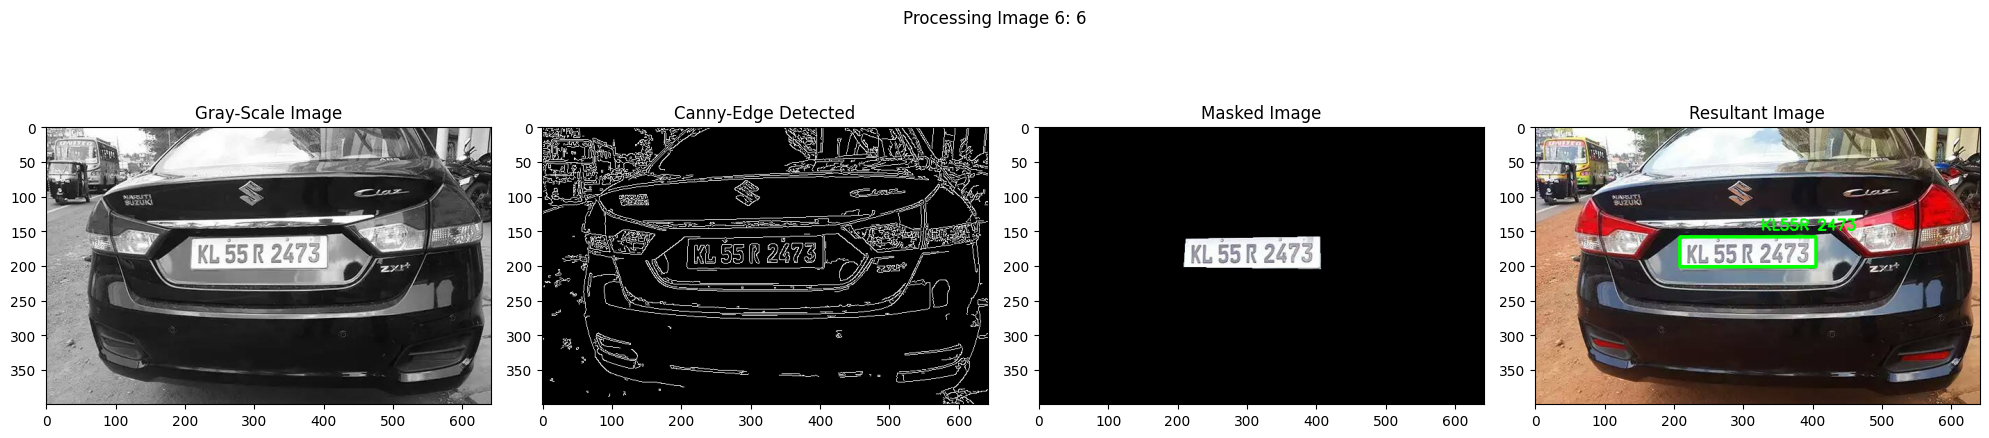

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


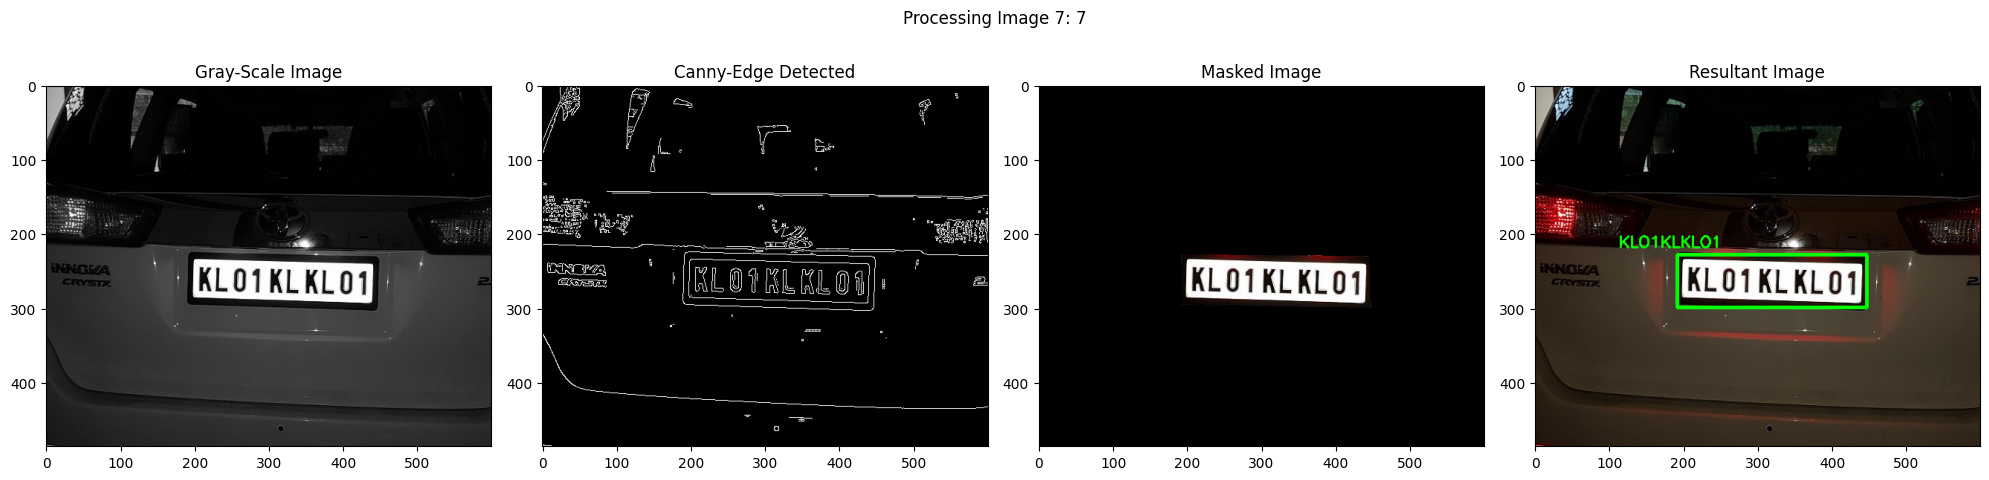

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


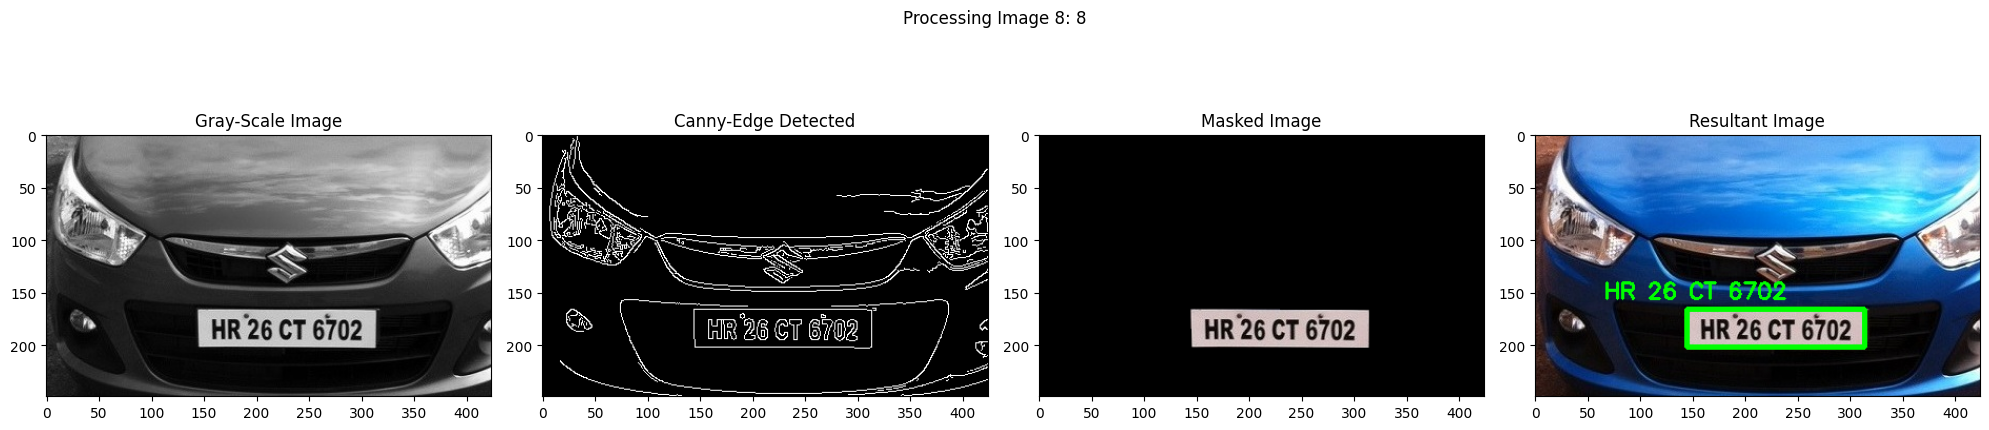

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


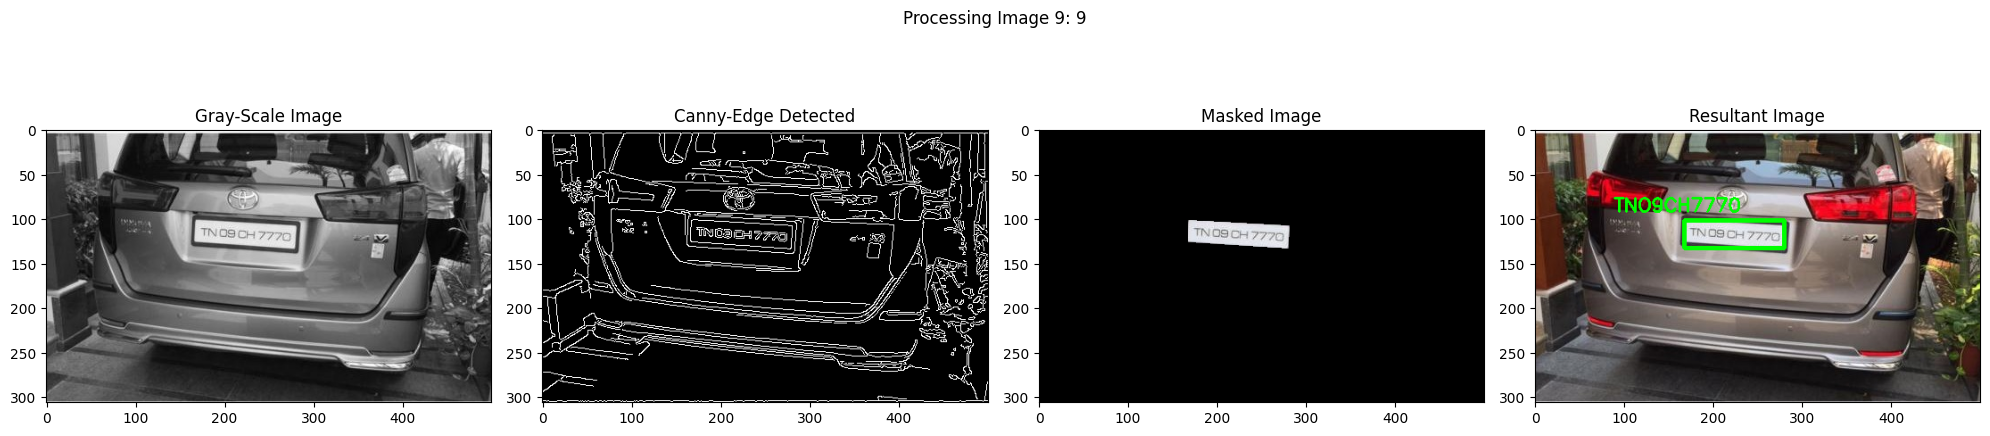

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


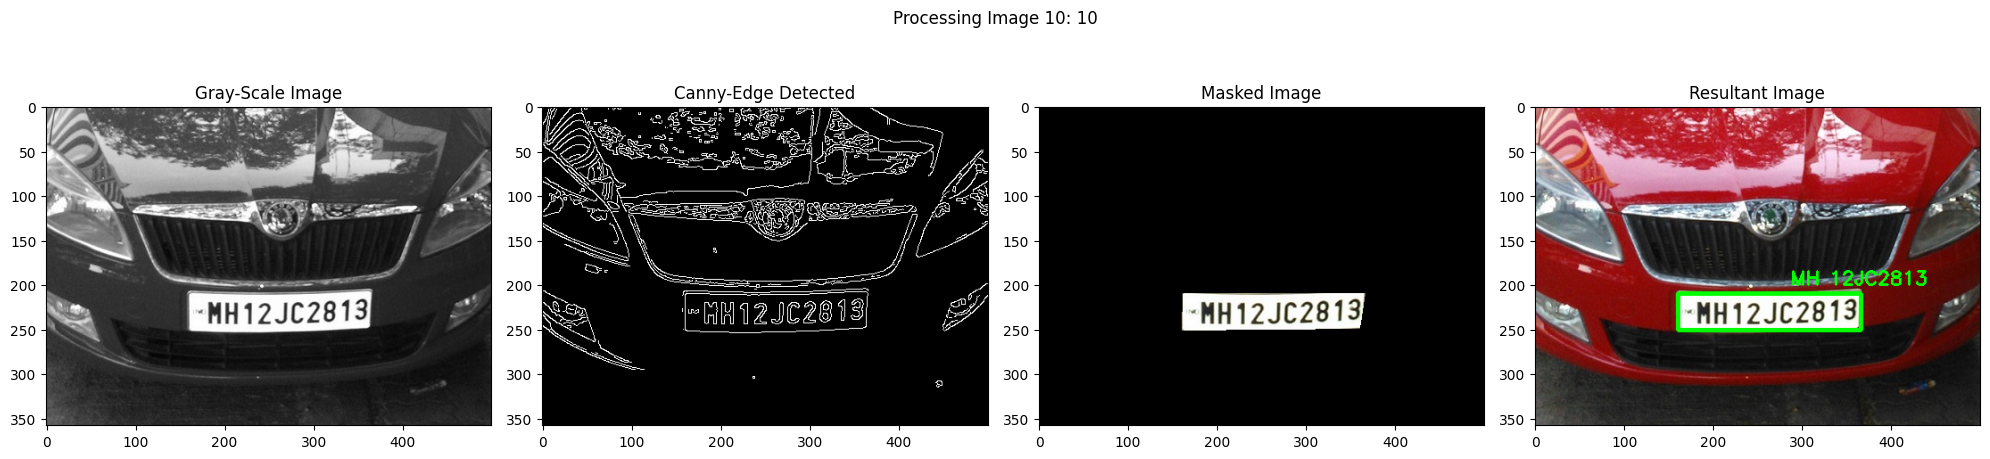

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import imutils
import easyocr

# Defining a list of image labels.
image_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Iterating over each image label
for idx, label in enumerate(image_labels, 1):
    image_path_jpeg = f'{label}.jpeg'
    image_path_png = f'{label}.png'
    
    if os.path.isfile(image_path_jpeg):
        image_path = image_path_jpeg
    elif os.path.isfile(image_path_png):
        image_path = image_path_png
    else:
        continue 
    
    # Reading the image using OpenCV
    image = cv2.imread(image_path)
    
    # Converting the image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Creating subplots for each processing step
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f'Processing Image {idx}: {label}')
    
    # Displaying the grayscale image
    axs[0].imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Gray-Scale Image')
    
    # Applying bilateral filtering for noise reduction
    bilateral_filter = cv2.bilateralFilter(gray_img, 11, 17, 17)
    
    # Applying Canny edge detection
    canny_edge = cv2.Canny(bilateral_filter, 30, 200)
    
    # Displaying the edges detected image
    axs[1].imshow(cv2.cvtColor(canny_edge, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Canny-Edge Detected')
    
    # Finding contours in the edged image
    keypoints = cv2.findContours(canny_edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    
    # Sorting the contours by area in descending order and select the top 10
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    
    # Initializing the location variable
    location = None
    
    # Iterating over the contours
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        
        if len(approx) == 4: # Checking if the contour has four corners
            location = approx
            break
    
    # Creating a mask with the same shape as the grayscale image
    mask = np.zeros(gray_img.shape, np.uint8)
    
    # Drawing the contour on the mask
    masked_image = cv2.drawContours(mask, [location], 0, 255, -1)
    
    # Applying the mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Display the masked image
    axs[2].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    axs[2].set_title('Masked Image')

    reader = easyocr.Reader(['en', 'en'])

    img_text = reader.readtext(masked_image)
    final_text = ""
    
    for _, text, __ in img_text:  # _ = bounding box, text = text, and __ = confidence level
        final_text += " "
        final_text += text
    
    # Draw a rectangle around the contour on the original image
    result = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    
    text_position = (tuple(approx[0][0])[0] - 90, tuple(approx[0][0])[1] - 10)
    
    # Choose font, scale, and color
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    font_color = (0, 255, 0)
    font_thickness = 2
    
    # Adding the text to the image
    cv2.putText(result, final_text, text_position, font, font_scale, font_color, font_thickness)
    
    # Display the final result
    axs[3].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axs[3].set_title('Resultant Image')
    
    # Plotting
    plt.tight_layout()
    plt.show()